In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_handler import COCODatasetHandler
import torch
print(torch.cuda.is_available())

coco = COCODatasetHandler("C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017", "train2017")

True
loading annotations into memory...
Done (t=14.71s)
creating index...
index created!


In [8]:
target_batch = coco.find_instances("wine glass", 500, max_area=1200, min_area=800)
prototype = target_batch[5:]
test_images = target_batch[:5]

In [9]:
from visual_search import VisualSearchModel

model = VisualSearchModel()
model.memorize_target_batch(prototype)

Memorized target from 495 instances
Response mean range: [15.1663, 117.1728]
Response variance range: [159.1082, 2534.8132]


{'image_id': 81944, 'image_path': 'C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017\\train2017\\000000081944.jpg', 'annotation_id': 1874868, 'bbox': [274.4, 0.0, 36.67, 56.25], 'bbox_dict': {'x1': 274.4, 'y1': 0.0, 'x2': 311.07, 'y2': 56.25}, 'area': 994.0328999999995, 'category_id': 46, 'category_name': 'wine glass', 'image': <PIL.Image.Image image mode=L size=427x640 at 0x2436F458290>}
(640, 427)
  Fixations: 3
    Fixation 1: (239, 247) - Distance: 225.3px
    Fixation 2: (251, 279) - Distance: 254.3px
    Fixation 3: (379, 386) - Distance: 368.4px
  Final distance to target: 368.4 pixels
  Creating basic visualization...


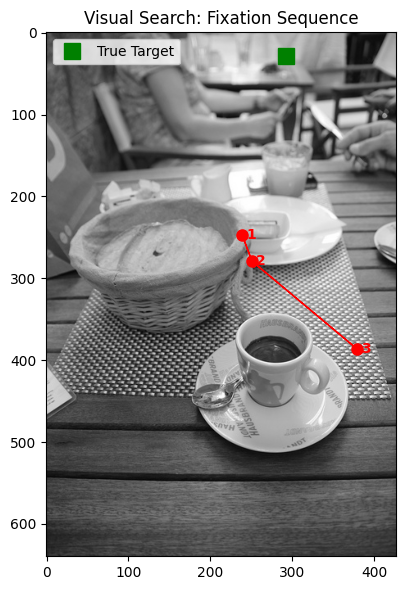

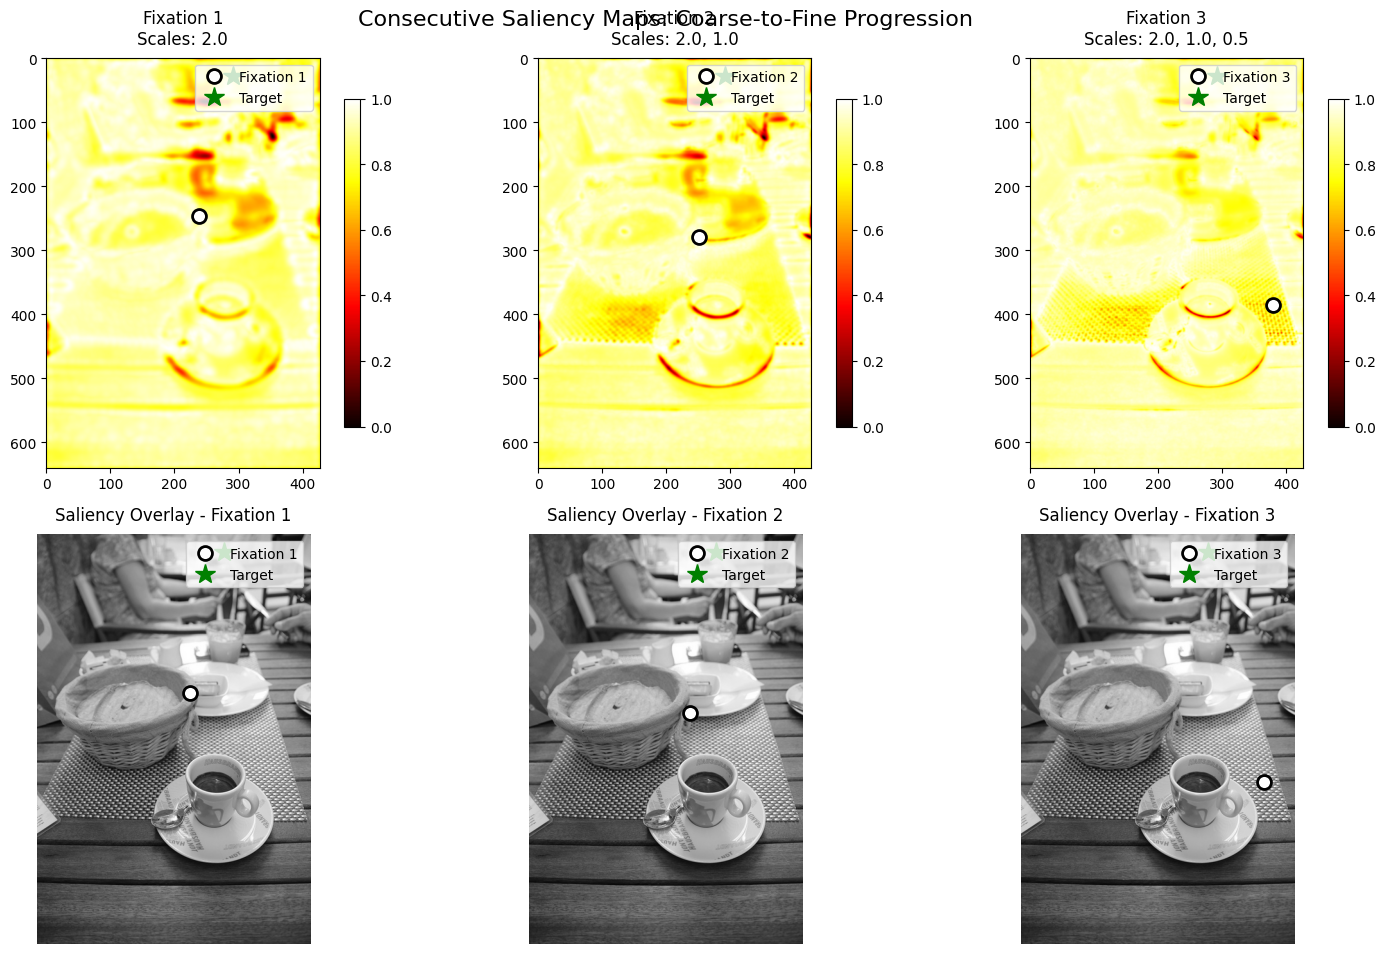

{'image_id': 417834, 'image_path': 'C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017\\train2017\\000000417834.jpg', 'annotation_id': 665963, 'bbox': [222.85, 290.79, 26.76, 62.44], 'bbox_dict': {'x1': 222.85, 'y1': 290.79, 'x2': 249.60999999999999, 'y2': 353.23}, 'area': 1058.1284499999995, 'category_id': 46, 'category_name': 'wine glass', 'image': <PIL.Image.Image image mode=L size=640x480 at 0x244176825A0>}
(480, 640)
  Fixations: 3
    Fixation 1: (326, 282) - Distance: 98.5px
    Fixation 2: (319, 294) - Distance: 87.6px
    Fixation 3: (415, 200) - Distance: 216.6px
  Final distance to target: 216.6 pixels
  Creating basic visualization...


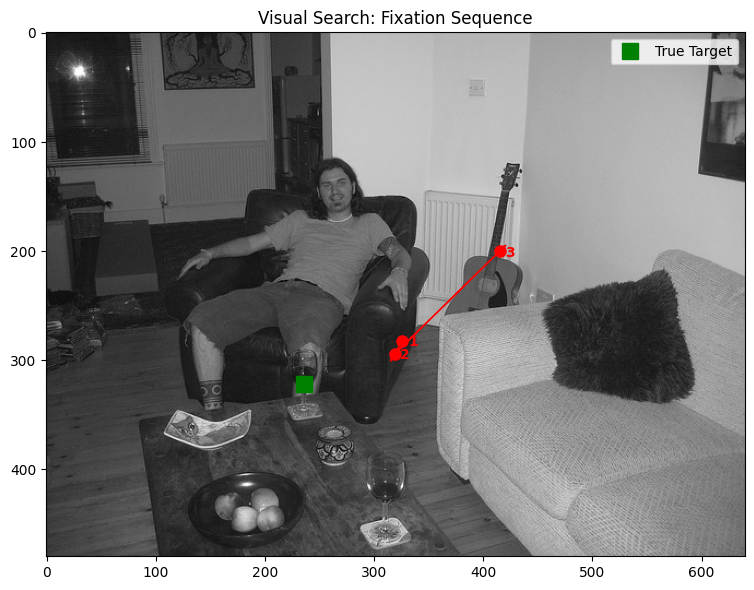

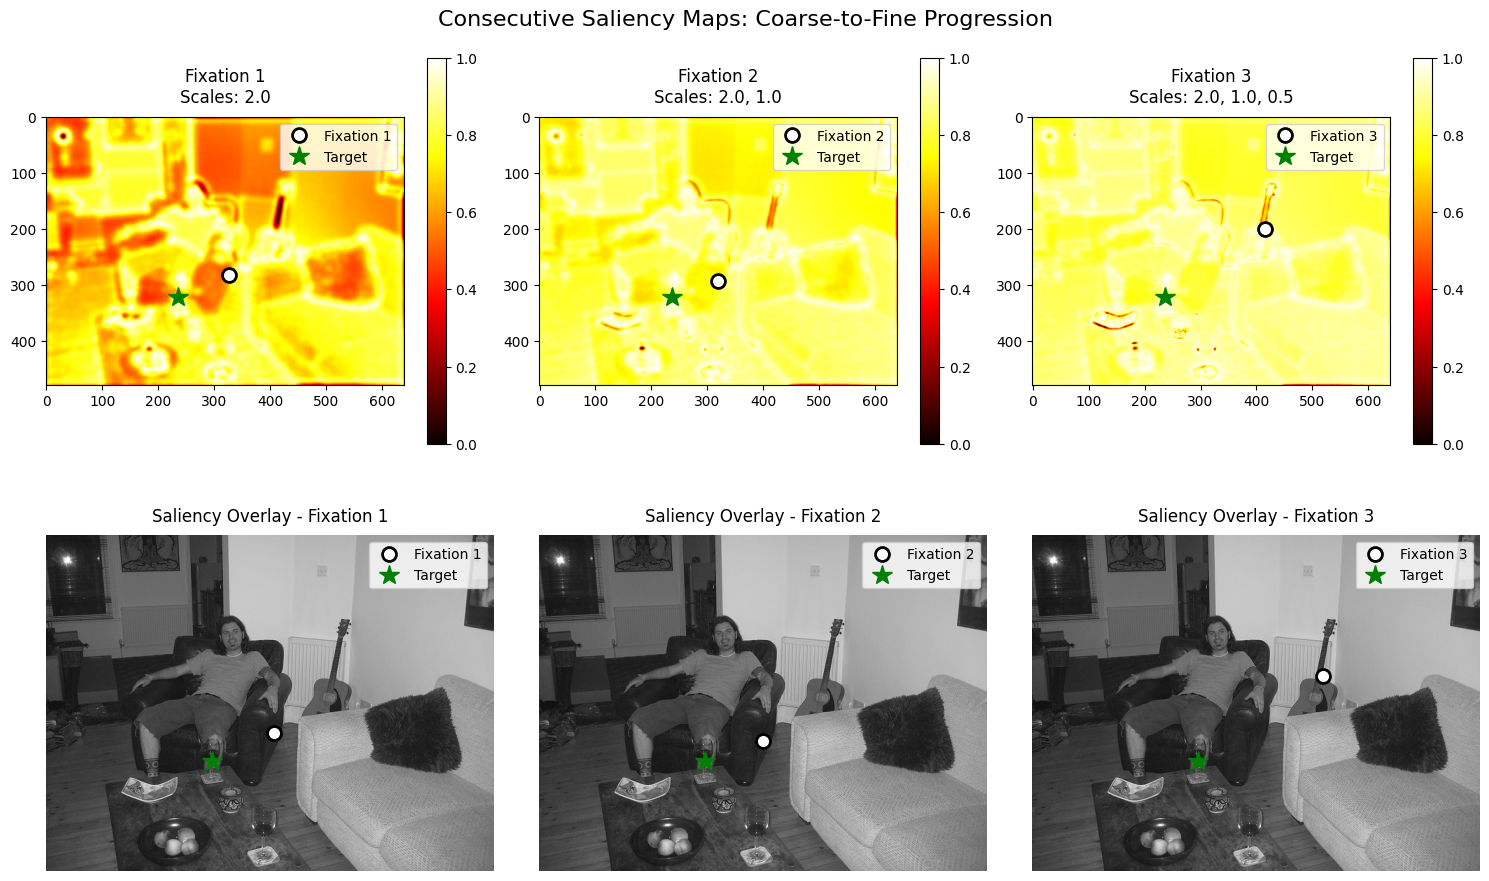

{'image_id': 155696, 'image_path': 'C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017\\train2017\\000000155696.jpg', 'annotation_id': 662567, 'bbox': [175.92, 265.92, 33.28, 54.42], 'bbox_dict': {'x1': 175.92, 'y1': 265.92, 'x2': 209.2, 'y2': 320.34000000000003}, 'area': 1171.3031500000002, 'category_id': 46, 'category_name': 'wine glass', 'image': <PIL.Image.Image image mode=L size=640x425 at 0x2429E8BA0C0>}
(425, 640)
  Fixations: 3
    Fixation 1: (292, 221) - Distance: 123.2px
    Fixation 2: (270, 217) - Distance: 108.9px
    Fixation 3: (293, 198) - Distance: 138.7px
  Final distance to target: 138.7 pixels
  Creating basic visualization...


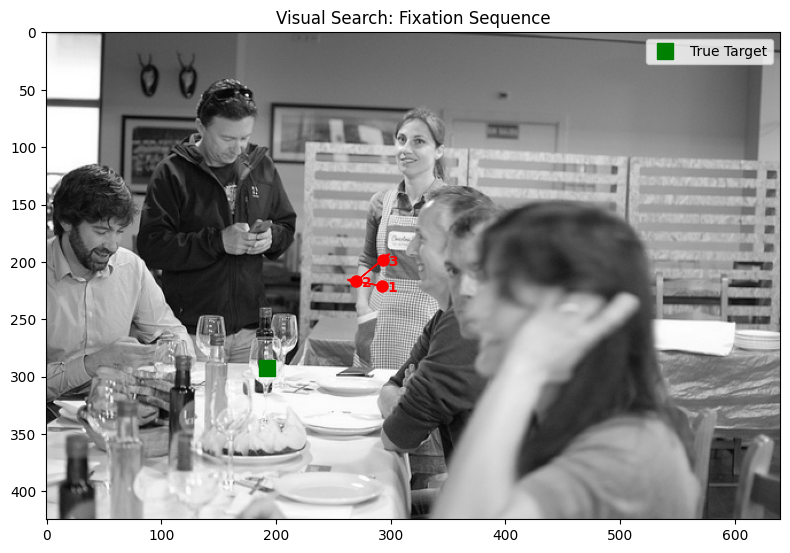

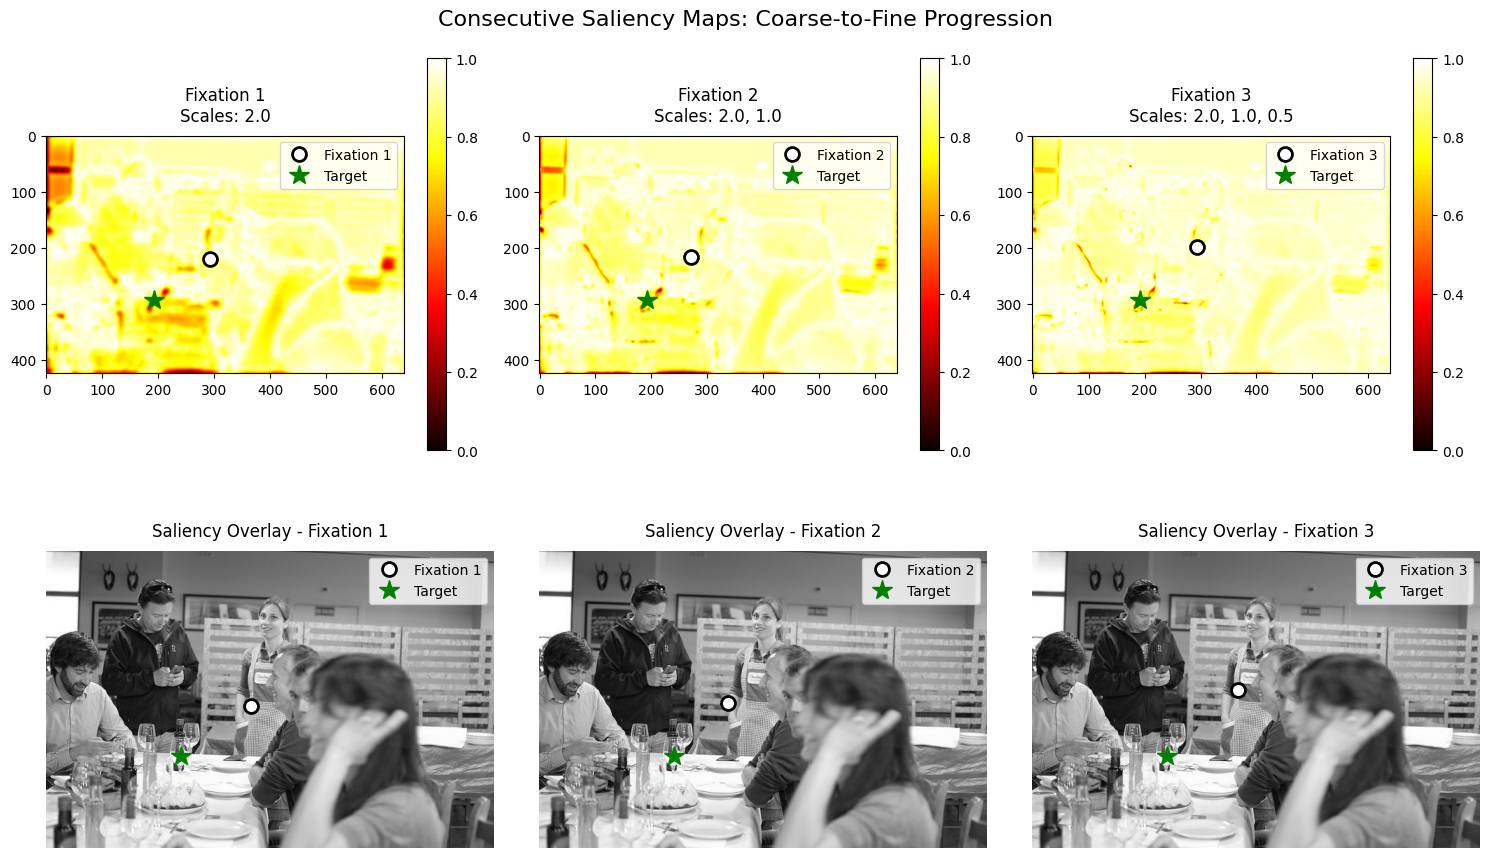

{'image_id': 581683, 'image_path': 'C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017\\train2017\\000000581683.jpg', 'annotation_id': 664038, 'bbox': [106.01, 457.95, 28.29, 74.03], 'bbox_dict': {'x1': 106.01, 'y1': 457.95, 'x2': 134.3, 'y2': 531.98}, 'area': 1132.5318000000002, 'category_id': 46, 'category_name': 'wine glass', 'image': <PIL.Image.Image image mode=L size=428x640 at 0x24417E99970>}
(640, 428)
  Fixations: 3
    Fixation 1: (154, 332) - Distance: 165.5px
    Fixation 2: (180, 367) - Distance: 140.5px
    Fixation 3: (246, 526) - Distance: 130.0px
  Final distance to target: 130.0 pixels
  Creating basic visualization...


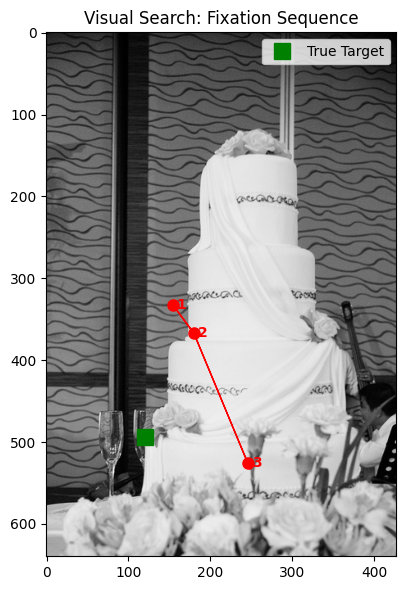

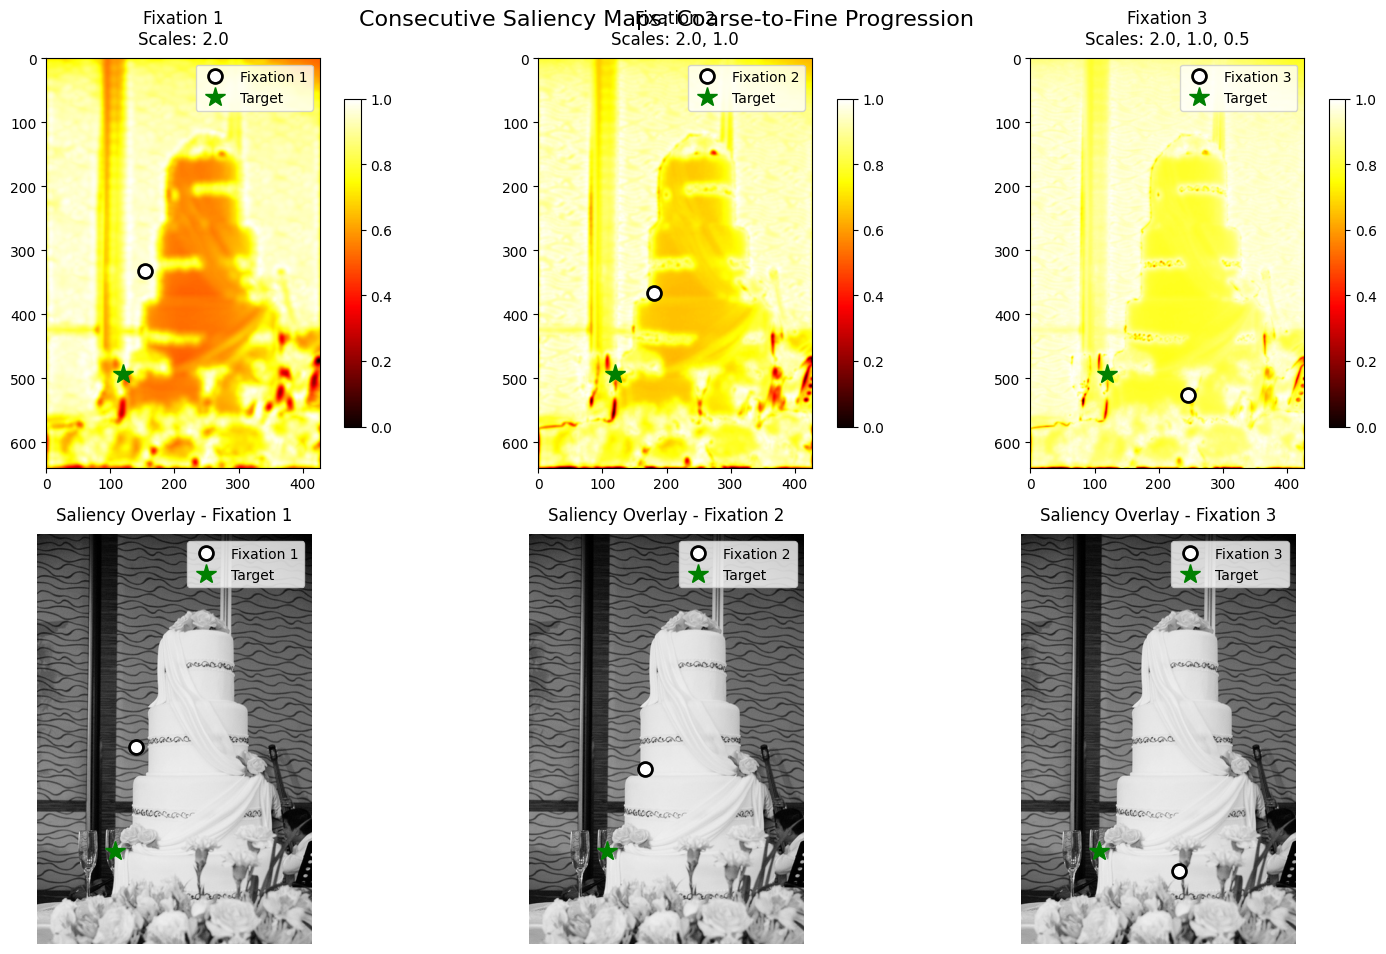

{'image_id': 327768, 'image_path': 'C:\\Users\\julia\\Documents\\KEMAI Datasets\\CoCo\\train2017\\train2017\\000000327768.jpg', 'annotation_id': 661675, 'bbox': [467.82, 186.05, 26.05, 60.54], 'bbox_dict': {'x1': 467.82, 'y1': 186.05, 'x2': 493.87, 'y2': 246.59}, 'area': 846.8785500000007, 'category_id': 46, 'category_name': 'wine glass', 'image': <PIL.Image.Image image mode=L size=640x424 at 0x2436F6BBDA0>}
(424, 640)
  Fixations: 3
    Fixation 1: (375, 177) - Distance: 112.0px
    Fixation 2: (419, 197) - Distance: 63.9px
    Fixation 3: (494, 225) - Distance: 16.6px
  Final distance to target: 16.6 pixels
  Creating basic visualization...


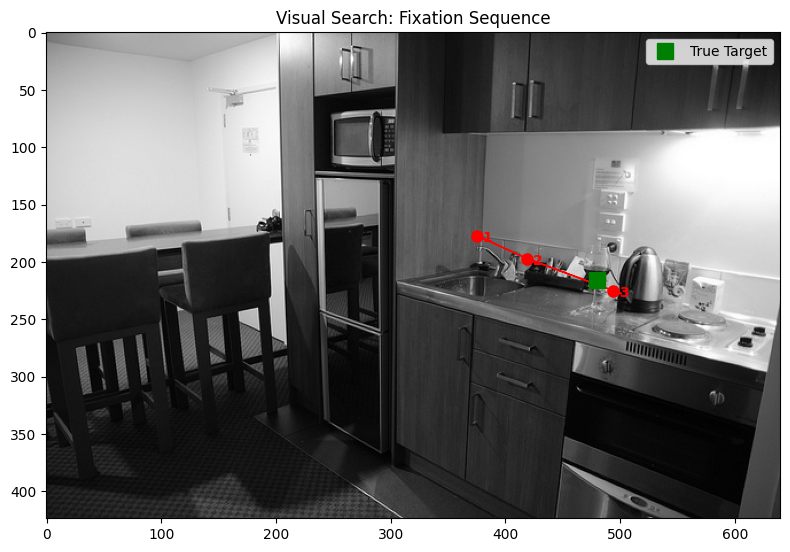

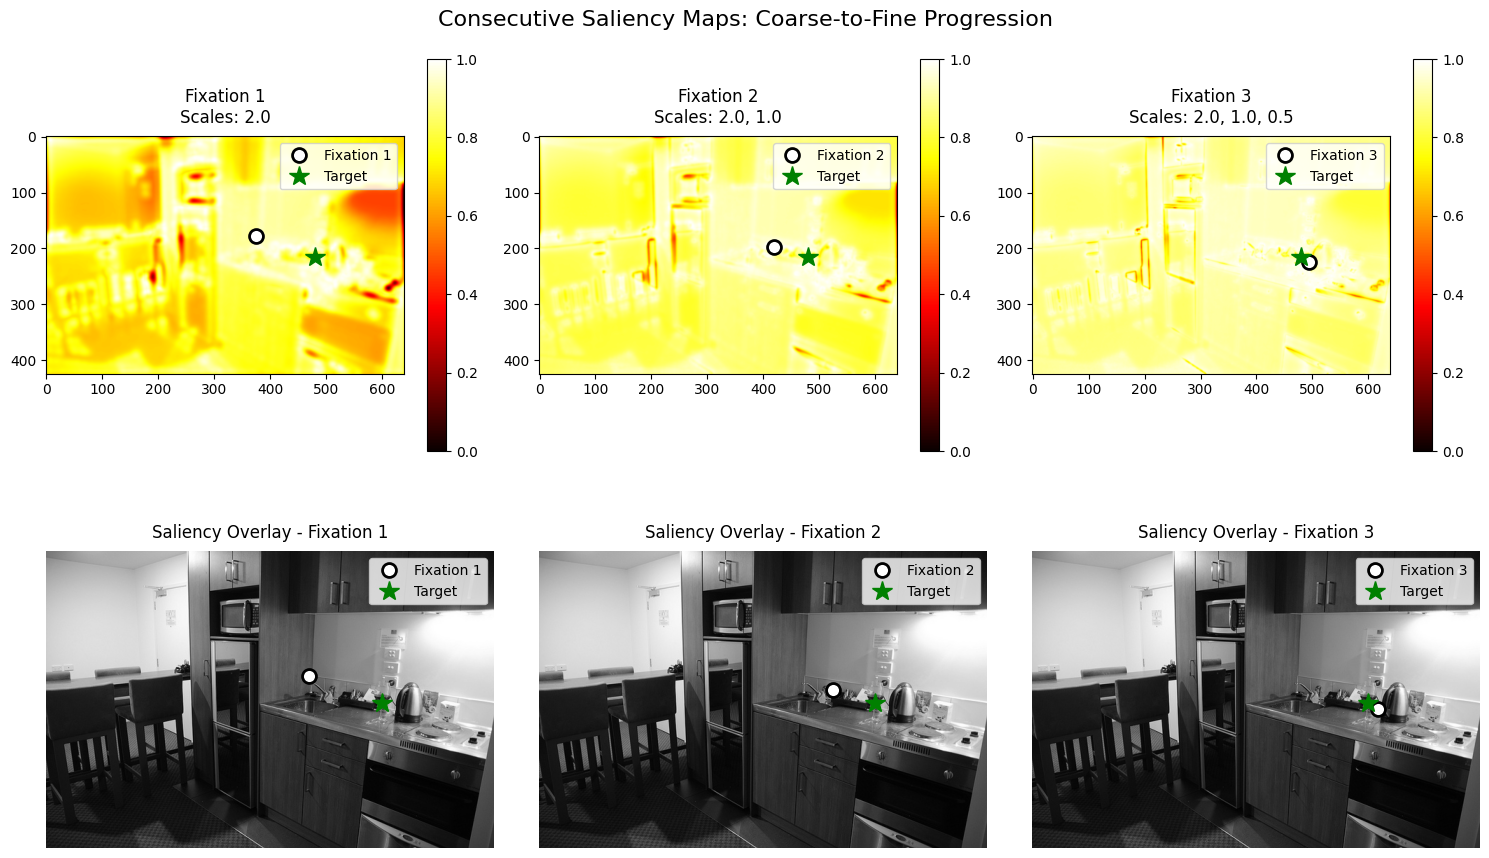

In [10]:
for idx, test_image in enumerate(test_images):
    print(test_image)
    bbox = test_image["bbox_dict"]
    target_location = (int((bbox['x1'] + bbox['x2']) / 2), int((bbox['y1'] + bbox['y2']) / 2))

    image = np.array(test_image["image"])
    print(image.shape)
    fixations = model.visual_search(image)

    # Calculate performance metrics
    final_fixation = fixations[-1]
    distance_to_target = np.sqrt(
        (final_fixation[0] - target_location[0])**2 +
        (final_fixation[1] - target_location[1])**2
    )

    print(f"  Fixations: {len(fixations)}")
    for i, (x, y) in enumerate(fixations):
        dist = np.sqrt((x - target_location[0])**2 + (y - target_location[1])**2)
        print(f"    Fixation {i+1}: ({x}, {y}) - Distance: {dist:.1f}px")

    print(f"  Final distance to target: {distance_to_target:.1f} pixels")

    # Visualize results
    print("  Creating basic visualization...")
    model.visualize_search(image, fixations, target_location)
    model.visualize_consecutive_saliency_maps(image, fixations, target_location)